# Basic Reinforcement Learning (RL) Theory with a Solution of a Simplified GridWorld Problem Using Q-Learning
In my humble opinion, the mathematics behind RL theory has vital importance, unlike other machine learning algorithms. Designing the environment and agent needs proper tuning of some parameters and coefficients. To tune them properly, the designer must learn mathematics at least superficially. At this point, Sutton and Barto's "Reinforcement Learning: An Introduction" book is a perfect reference for learning the mathematics behind the RL theory, deeply.

In this notebook, I will try to explain Q-Learning theory, one of the RL algorithms, with a practice of a problem example. I will also try to mention mathematical expressions about it, superficially. I highly recommend Sutton and Barto's book for getting inside the RL and learning it deeply. From now on, this book is my only reference for theoretical expressions.

**Also, I highly encourage you to re-implement this solution with your own approach by changing the places of cliffs or size of the grid world. You can easily change them in *envInfo* variable. But be careful, do not forget to update *GridWorldEnvironment* class.**

We will be dealing with a grid world environment shown below and while coding it, we will not be using any RL packages: The agent must finish the maze without neither going outside of the grid world nor going on red cells.

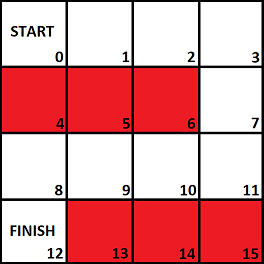

Table of Contents:
1. [What is Reinforcement Learning?](#1)
1. [Markov Decision Process](#2)
1. [Solution of MDPs](#3)
1. [Q-Learning](#4)
1. [Defining the MDP for Grid World Problem](5#)
1. [Coding the Grid World](6#)
    1. [Coding the Environment](#61)   
    1. [Coding the Agent](#62)
    1. [Training the Agent and Results](#63)
    1. [Testing the Agent and Results](#64)
1. [Conclusion](#7)
1. [References](#100)

<a id="1"></a>
### 1. What is Reinforcement Learning?
Reinforcement Learning is learning of an agent what action to take and when to take it in an environment. Every action has a consequence. It gets a reward or it gets a punishment. The environment mentioned maybe a chess game or tic-tac-toe game and the agent would be the player, it gets a reward when it wins the game or it's punished when it loses. Also, the environment may be a maze or a computer game. A common property of all these environments is that they are all decision-based environments. In chess or tic-tac-toe, the agent must decide the next movement or in a maze, the agent must decide where to go. A common way of solving these decision problems is by defining them as a Markov Decision Process (MDP).

<a id="2"></a>
## 2. Markov Decision Process
Markov Decision Process formulates the decision taking problems by defining elements of it. 

An MDP has 5 fundamental elements:

* Environment
* Agent
* State Space
* Action Space
* Reward

#### 1. Environment
The environment covers all the other elements of MDP. Everything occurs in the environment.

#### 2. Agent
The agent observes the environment's state, takes an action according to the old experiences or randomly and gets a reward as a result of its action. For example, in a chess game, every move is an action. We expect the agent to learn by its own experiences while it is discovering the environments.

#### 3. State Space
The state space includes all possible states of the environment. For example, in a chess game, the current positions of all pieces is a state.
#### 4. Action-Space
The action space includes all possible action that the agent can take. In a chess game, all possible moves are actions.

#### 5. Reward
The agent gets a reward as a result of its every action. Losing a piece in chess might be rewarded negatively or winning the game might be rewarded positively.

Block diagram of the MDP is given below [[1]](#100)

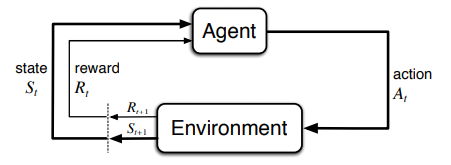

<a id="3"></a>
## 3. Solution of MDPs
There are several ways of solving MDPs by Reinforcement Learning. We will cover four of them, and take a closer look at one of them.

#### 1. Dynamic Programming
Dynamic programming is an old way of solving MDPs. It is fundamental, but not considered as a practical way. It does not learn from experience, tries to calculate all possible actions on all possible states. Therefore, it needs to know the transition probabilities between state-action pairs. Our PCs at home may not handle calculating all of these processes.

#### 2. Monte Carlo
In Monte Carlo, the agent learns from experience as we expected. However, it needs to finish an episode to learn and it needs many episodes. Also, it requires a model of the environment, transition probabilities. The transition probabilities are tough to obtain and we may not obtain them in every environment. The figure below represents the generic value update rule of Monte Carlo methods [[1]](#100):

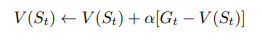

where $G_{t}$ is the return —total reward of an episode— of a whole episode, that is, Monte Carlo methods are obliged to see the results of an episode to apply the value update rule [[1]](#100).

#### 3. **Temporal Difference Learning**
Temporal Difference Learning (TDL) is the one that we will take a closer look at. In this notebook, we will learn Q-Learning, which is one of the TDL methods, and apply it to a grid world problem. In TDL methods, we do not need to know transition probabilities between state-action pairs. The agent learns from nothing by experiencing the environment itself. Also, it learns the consequences of its next actions with the help of mathematics behind TDL. The figure below represents the generic value update rule of TDL methods [[1]](#100):

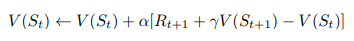

In value update rules, TDL methods use instant rewards at each time step instead of the return of episode, so they learn faster. Also, Monte Carlo methods discount some part of ”return”s; however, TDL methods discount some part of ”reward”s, that is, TDL methods are more efficient. In summary, TDL methods have more advantages over Monte Carlo both in performance and in learning speed.

#### 4. Deep Q-Networks
Deep Q-Network (DQN) is a method that combines Deep Neural Networks and Q-Learning. In some environments, state space or action space may grow bigger and bigger as the agent explores it. In such situations, Q-Learning or other conventional algorithms cannot handle solving the MDPs and DQNs are used.

<a id="4"></a>
## 4. Q-Learning
Q-Learning is an off-policy TDL algorithm that does not follow a policy for taking actions and choose them greedily. In Q-Learning, all state-action pair values are saved in a Q-Table and the agent takes actions according to the values in Q-Table. Let's take a closer look at a Q-Table. Think of an environment that its state space has five states: \[0, 1, 2, 3, 4\]. And its action space has two actions: \[0, 1\] (In our grid world problem we will have four actions: up, left, down, right). Then our Q-Table matrix's size will be 5x2. Q-Table is usually initialised with default values of zero. So, let's create a default Q-Table for our environment. We will import the NumPy package to handle matrix operations.

In [ ]:
import numpy as np # we imported numpy package as np so we will call it np in the future
import matplotlib.pyplot as plt # we import matplotlib.pyplot as plt

We have successfully imported the NumPy. Now, let's define state and action space sizes and create our default Q-Table. We will use zeros((rows, columns)) method from the NumPy. It returns a matrix consists of zeros with a given size.

In [ ]:
num_States = 5 # we have 5 states in our state space
num_Actions = 2 # we have 2 actions in our action space

q_Table = np.zeros((num_States, num_Actions)) # we define Q-Table with all zeros in it
print(q_Table) # we print our first tiny Q-Table

Rows of the Q-Table represent states, and columns represent actions. For instance, our agent is in state-0 (0th row of Q-Table). Then it has a decision to make. Should it take action-0, or should it take action-1 (corresponding columns)? OK, in order to say the answer we must first learn how the values in Q-Table are updated. Q-Learning has an update rule inherits from TDL's update rule. The figure below shows the Q-Learning value update rule [[1]](#100):

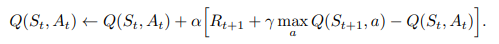

where t+1 is current time interval:
* $A_{t}$ is the action at time interval t
* $S_{t}$ is the state at time interval t
* $S_{t+1}$ is the state at time interval t+1, which the agent comes by taking action $A_{t}$
* $R_{t+1}$ is the reward at time interval t+1, which is get by taking action $A_{t}$
* $a$ is all available actions to corresponding state, the statement here means, it gives the value of the action which has the maximum value
* $α$ is the learning rate
* $γ$ is the discount factor, $α$ and $γ$ will be explained later

OK, everything looks perfect for this tiny virtual environment, right? Not for big environments. Think of an environment that has more than one solutions. For example a maze. There are several ways to exit the maze, some of them are short, some of them are long; however, one of them is the shortest. We want our agent to learn the shortest way out of the maze. So, if it always takes the maximum valued actions, it fails to explore new ways. It would be stuck in one way and exploit it continuously. Because even if the way is long it gets a nice reward in the end and it does not want to risk it. Nevertheless, you have to risk it to get the biscuit, right? 

This is called **exploration-exploitation dilemma** in Reinforcement Learning [[1]](#100). The agent learns a way out, but what if there is a shorter way? There is a way to find the balance. We can make the agent explore with a probability. So it explores sometimes and it exploits sometimes. This probability is called $ε$ parameter and it is usually chosen as 1%. This is called epsilon greedy. The agent is greedy but there is a possibility for its exploration.

Now, let's take a look at three parameters we have learned:

* $γ$ parameter helps us that Q values do not converge to infinity if the episode is continuous. It is the importancce give to next rewards [[1]](#100).
* $α$ is learning rate and it determines the size of step while updating the value. It determines how important new information is [[1]](#100).
* $ε$ parameter is probability of taking a random action. A random number is generated before every action taken. If the number is bigger than epsilon, the agent exploit. If the number is smaller than epsilon, the agent explores [[1]](#100).

All these three parameters are chosen between 0 and 1. Also, the random number is chosen between 0 and 1.

Up to now, we learned the basic theory behind RL and Q-Learning. Now it's time to define our problem and solve it as an MDP.

<a id="5"></a>
## 5. Defining the MDP for Grid World Problem

#### 1. Environment
Our environment is the tiny grid world. It has an initial state called "Start", it has a terminal state called "Finish", it has a safe path with the colour of white, it has dangerous cells called "Cliff" with the colour of red. Also outside of the grid is considered a cliff.

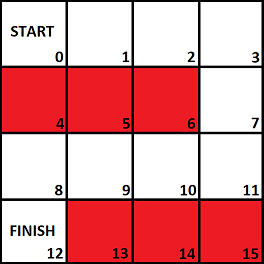

#### 2. Agent
We are free to choose an agent. It can be anything, me, you, a dog, a cat or a lovely rabbit. Yes, I will choose a lovely rabbit. I've found a free rabbit icon with no license. In my previous project, I used a coin. İn this notebook we will not focus on the visualisation of the environment.

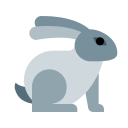

#### 3. State Space
State space consists of all 16 cells in the grid world. State numbers are illustrated in the bottom-right of cells.

#### 4. Action Space
Action space includes 4 different actions of moves: up, left, down, right.

#### 5. Reward
The agent gets a positive reward of 100 if it reaches the terminal "Finish" state. It gets a negative reward of 100 if it falls into a cliff (going to the cells with the colour red). Also, we will use a trick here. For the current reward formulation, the agent takes actions in the grid world. At the start, it frequently falls into a cliff and gets a big negative reward. However, if it stays on the safe path, it gets nothing, that is, it gets a reward of 0. So, it will try to stay on the safe path but it will fear exploring the next cells. In order to prevent this, we will the agent a negative reward of 1 for every action in the safe path. So, we are telling it that it should not wait in the grid world. It must move and find the terminal "Finish" state.

<a id="6"></a>
## 6. Coding the Grid World
The time has come, finally! We will start coding the grid world environment and Q-Learning agent without using any RL packages. Firstly, starting by designing and coding the environment is a good step.
<a id="61"></a>
#### 6.1. Coding the Environment
We will create a **GridWorldEnvironment** class. 

In the constructor of it, we will have **safePath** list, **cliffs** list, **startLoc** tuple, **trmLoc** tuple and **rewSttTrm** tuple. Coordinates are accepted as tuples: (row, column). It takes **self** and **info** arguments. We will send a list as **info** that contains safe path and cliffs as **envInfo**.
* **safePath** list contains the coordinates of safe points.
* **cliffs** list contains the coordinates of cliff (red) points.
* **startLoc** tuple is the coordinate of "Start" state.
* **trmLoc** tuple is the coordinate of terminal "Finish" state.
* **rewSttTrm** tuple contains the variables of types: (int, int, bool). 0th index is the reward, 1st index is the state number and 2nd state is a boolean that checks whether the terminal state is reached.

* **getSttNo** method takes the argument **loc** as the current location of agent, and converts it to a state number. States are numerated from 0 to 15 as mentioned before.

* **envStart** method is called when the episode is restarted. Resets the environment for a new episode.

* **envStep** method is called with the every stop taken in the environment. It updates environment. It takes the action taken by agent as argument.

    First, we check the possible next location of the agent according to its action. For example, if the action 0, that is up, we decrease the row of the **agentLoc** by 1 and check whether it is in the borders of the grid. If the row of it gets smaller than 0, then it is not in the borders, we send the agent to (1,0) coordinate (coordinate of a cliff, we consider the moves outside the borders as a falling into a cliff). If it is in the borders, then the possible next location is the certain next location of the agent. Then, we repeat the same process for other action possibilities within **elif** statements.

    Then, we initiate the **reward** as 1. So, if the agent does not fall into the cliffs or terminate the episode, then it gets a negative reward of 1 as mentioned before. And we initiate the **terminal** as False.

    Then, we check if the agent reaches the terminal state. If it does we update the **reward** as 100 and **terminal** as True. Else if, we check if the agent falls into the cliffs, if it does we update the **reward** as -100 and **terminal** as False then we send the agent to **startLoc**. Else we leave **reward** as 1 and **terminal** as False.

    Finally, we update **rewSttTrm** and return it.

In [ ]:
envInfo = [[(0,0), (0,1), (0,2), (0,3), (1,3), (2,3), (2,2), (2,1), (2,0), (3,0)], [(1,0), (1,1), (1,2), (3,1), (3,2), (3,3)]]
# envInfo[0] => safe path list
# envInfo[1] => cliffs list

In [ ]:
class GridWorldEnvironment:
    def __init__(self, info):
        
        self.safePath = info[0] # contains tuples
        self.cliffs = info[1] # contains tuples
        self.startLoc = self.safePath[0] # safe path list's 0th element is start state
        self.trmLoc = self.safePath[9] # safe path list's 9th element is finish state
        self.rewSttTrm = (None, None, None) # (int, int, bool)
    
    def getSttNo(self, loc):
        """
        The method that converts current location to a state number. 
        Returns state number.
        """
        return 4*loc[0]+loc[1]
    
    def envStart(self):

        """The method called when the episode starts, it resets the environment.

        Returns:
        state number.
        """
        reward = 0
        # agentLoc is the current location of the agent
        self.agentLoc = self.startLoc
        # state is state number as an int
        state = self.getSttNo(self.agentLoc)
        termination = False
        self.rewSttTrm = (reward, state, termination)

        return self.rewSttTrm[1]
    
    def envStep(self, action):
        """The method called with every step taken in the environment and updates the environment.

        Args:
            action: The action taken by the agent

        Returns:
            (int, int, bool): a tuple of the reward, state,
                and boolean shows that if it's terminal.
        """
        if action == 0: # up         
            possibleNextLoc = (self.agentLoc[0] - 1, self.agentLoc[1])
            if possibleNextLoc[0] >= 0: # check the agent within grid?
                self.agentLoc = possibleNextLoc # if within grid, current location is possible location
            else:
                self.agentLoc = (1,0) # go to a cliff
        elif action == 1: # left
            possibleNextLoc = (self.agentLoc[0], self.agentLoc[1] - 1)
            if possibleNextLoc[1] >= 0: # check the agent within grid?
                self.agentLoc = possibleNextLoc # if within grid, current location is possible location
            else:
                self.agentLoc = (1,0) # go to a cliff
        elif action == 2: # down
            possibleNextLoc = (self.agentLoc[0] + 1, self.agentLoc[1])
            if possibleNextLoc[0] < 4: # check the agent within grid?
                self.agentLoc = possibleNextLoc # if within grid, current location is possible location
            else:
                self.agentLoc = (1,0) # go to a cliff
        elif action == 3: # right
            possibleNextLoc = (self.agentLoc[0], self.agentLoc[1] + 1)
            if possibleNextLoc[1] < 4: # check the agent within grid?
                self.agentLoc = possibleNextLoc # if within grid, current location is possible location
            else:
                self.agentLoc = (1,0) # go to a cliff

        reward = -1 # initiate reward as -1,agent gets a -1 reward for its every step in safe path,so it does not stuck
        terminal = False # holds the termination information
        
        if self.agentLoc == self.trmLoc: # check the terminal is reached?
            reward = 100 # give 100 reward if it terminates the episode
            terminal = True # bool of termination is true
        elif self.agentLoc in self.cliffs: # check fell into cliffs?
            reward = -100 # give -100 reward if it falls into the cliffs
            terminal = False # bool of termination is true
            self.agentLoc = self.startLoc # agent is sent to start state
        else:
            reward = -1 # default value
            terminal = False # default value
        
        self.rewSttTrm = (reward, self.getSttNo(self.agentLoc), terminal) # update rewSttTrm

        return self.rewSttTrm

<a id="62"></a>
#### 6.2. Coding the Agent
We have successfully implemented **GridWorldEnvironment** class. Now, we will create a **QLearningAgent** class. 

In the constructor of it, we will have **numActions** that is number of actions possible, **numStates** that is number of states, **epsilon**, **learningRate**, **discount**, **randGenerator** that will be needed for generating random numbers and **qTable** matrix that holds the Q values for state-action pairs like we implemented a basic version of it before. It takes **info** list as an argument. We will send the **agentInfo** list to it which contains the agent information.


* **agentStart** method is called when an episode starts. It initiates the agent. First, we take the **curentQ** from the **qTable**, which is the corresponding row of it according to the current state. Then we generate a random number between 0 and 1. If the number is smaller than epsilon, the agent takes its action randomly. Else if the number is bigger than epsilon, the agent takes the maximum valued action in **currentQ**. Then we save the **state** and **action** as **prevState** and **prevAction** so $A_{t+1}$ and $S_{t+1}$ become $A_{t}$ and $S_{t}$. This is the trick of TDL methods. Finally, we return the **action**.

* **agentStep** method is called with every step of the agent. It takes an action epsilon greedily as **agentStart** does. Also, it updates the qTable by Q-Learning update rule and returns the **action**.

* **agentEnd** method is called when an episode is finished. It neither return anything nor chooses an action. It only updates the qTable for the last action. So it does not take max(currentQ) into account because it does not takes an action.

* **argmax** method returns the index of action with the maximum value in **qValues** argument, which will be **currentQ**. First, we define **top** as negative infinity and initiate a **ties** list that contains indexes of the maximum qValues. Then we iterate over the elements of **qValues**. If an element is greater than the **top**, then we assign its value to the **top** and reset the ties list. Then if the element is equal to the **top**, we add its index to the ties list. Finally, we return an element of the ties chosen randomly.

* **agentTest** method exploits the **qTable** and chooses an action greedily. It returns the chosen **action**. It will be using for testing after training the agent.

In [ ]:
agentInfo = [4, 16, 0.01, 0.1, 1, 0] ###numActions, numStates, epsilon, learningRate, discount, random seed

In [ ]:
class QLearningAgent:

    def __init__(self, info):
        
        self.numActions = info[0]
        self.numStates = info[1]
        self.epsilon = info[2]
        self.learningRate = info[3]
        self.discount = info[4]
        self.randGenerator = np.random.RandomState(info[5])

        self.qTable = np.zeros((self.numStates, self.numActions)) # The array of action-value estimates.

    def agentStart(self, state):
        
        """The method called when the episode starts, it resets the environment.
        
        Args:
            state (int): the state from the
                environment's evnStart function.
        Returns:
            action (int): the first action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        currentQ = self.qTable[state,:] # corresponding row of qTable
        if self.randGenerator.rand() < self.epsilon: # random number generation
            action = self.randGenerator.randint(self.numActions) # take an action randomly
        else:
            action = self.argmax(currentQ) # take an action greedily, the max valued action in currentQ
        self.prevState = state # the trick of TDL
        self.prevAction = action # the trick of TDL
        return action

    def agentStep(self, reward, state):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            state (int): the state from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        currentQ = self.qTable[state, :] # corresponding row of qTable
        if self.randGenerator.rand() < self.epsilon:  # random number generation
            action = self.randGenerator.randint(self.numActions) # take an action randomly
        else:
            action = self.argmax(currentQ) # take an action greedily, the max valued action in currentQ
        
        self.qTable[self.prevState,self.prevAction] = self.qTable[self.prevState,self.prevAction] + self.learningRate*(reward + self.discount*max(currentQ) - self.qTable[self.prevState,self.prevAction]) # update qTable
        
        self.prevState = state # the trick of TDL
        self.prevAction = action # the trick of TDL
        return action


    def agentEnd(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """
        
        self.qTable[self.prevState,self.prevAction] = self.qTable[self.prevState,self.prevAction] + self.learningRate*(reward - self.qTable[self.prevState,self.prevAction])

    def argmax(self, qValues):
        """argmax with random tie-breaking
        Args:
            qValues (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf") # top as negative infinity
        ties = [] # initiate ties

        for i in range(len(qValues)):
            if qValues[i] > top: # element is greater than top
                top = qValues[i] # the element is the new top
                ties = [] # ties resets

            if qValues[i] == top: # if an element is equal to top
                ties.append(i) # we add its index to ties

        return self.randGenerator.choice(ties) # return one of ties randomly
    
    def agentTest(self, state):
        
        # Choose action greedily by exploiting qTable
        currentQ = self.qTable[state,:]
        
        action = self.argmax(currentQ)
        
        return action

<a id="63"></a>
#### 6.3. Training the Agent
We have successfully implemented **QLearningAgent** class. Now, we can start training the agent. 

* First, we take an instance from our classes and initiate some variables. **returns** list will hold the returns of every iteration. **currentReturn** is the return of the current iteration (episode) and we will increment it by the rewards.

In [ ]:
env = GridWorldEnvironment(envInfo) # instance of environment
agent = QLearningAgent(agentInfo) # instance of agent
returns = [] # a list that we will append return of every episode
currentReturn = 0 # return of the current episode, we will increment it by rewards

* Now, we can implement the for loop for iterations. We want 20 iterations. We reset **currentReturn** at the beginning of every iteration. Also at the beginning of every iteration we call **envStart** method that returns the state of the agent, we call **agentStart** with the argument of **stt** and it returns the action, also we call **envStep** with the argument of **act** and it returns reward, state and termination boolean. We increment **currentReturn** by the reward. Then while loop for the episode starts. In this loop we call **agentStep** and **envStep** and increment **currentReturn** again. If **trm** bool is True, that is, agent is terminated, append **currentReturn** to **returns** list and we break while loop.

In [ ]:
for i in range(30):
    print("Iteration Number: " + str(i))
    currentReturn = 0
    stt = env.envStart() 
    act = agent.agentStart(stt) # choose action
    rew, stt, trm = env.envStep(act)
    currentReturn += rew
    while(True):
        act = agent.agentStep(rew, stt) # update q table and choose action
        rew, stt, trm = env.envStep(act)
        currentReturn += rew
        if trm: # agent is terminated
            agent.agentEnd(rew) # make a final update to q table
            print("Agent is terminated!")
            returns.append(currentReturn) # save the return of the episode
            break

* Now, we finalized our training. We can print some results of our training. Let's take a closer look to our trained Q-Table.

In [ ]:
print(agent.qTable)

* At 0th row of Q-Table, we can clearly observe that the most valued action is 3rd column, which is the aciton of going right. By going right, the agent gets to state 1. In state 1, the most valued action is 3 again. Then the next state is 2. In state 2, the most valued action is 3 again. Then the next state is 3. In state 3, the most valued action is 2, which means that the next state is 7. In state 7, 7th row of Q-Table, the most valued action is 2. OK, stop! Is there something wrong here? Up to now, our agent never got a positive reward; however, the value of the 2nd action is positive. This comes true, owing to the **trick of TDL methods**, mentioned before. In value update rules, we have the **max(currentQ)** term. So possible maximum value of the actions of current state affects the previous state-action pair's value. So, the agent knows that 7th state is one step closer to the most valued terminal "Finish" state. Now, the agent gets to the state 11. In state 11, the most valued action is 1 and the value of it is bigger. So, the agent is one more step closer to the terminal state. Then the agent gets to the state 10. In state 10, the most valued action is 1 and the value of it is bigger. So, the agent is one more step closer to the terminal state. Then the agent gets to the state 9. In state 9, the most valued action is 1 and the value of it is bigger. So, the agent is one more step closer to the terminal state. **Then the agent gets to the state 8. In state 8, the most valued action is 2 and it's value is the biggest up to now. It is expected, because if the agent takes action 2 in state 8, it gets to the terminal state**. So we can confirm that our agent learns the safe path.

Now, let us plot the **returns** list. So we can see how the returns of episodes changed with progress of training.

In [ ]:
plt.plot(returns)
plt.ylabel('Sum of Rewards in an Episode ')
plt.xlabel('Iterations')
plt.show()

We can say that our agent has learned the safe path by the 2nd or 3rd iteration according to returns. However, sometimes it is safer grow iteration number a little bit for ensuring that the agent learns perfectly. Now, we can print most return that the agent got while it is learning.

In [ ]:
print(max(returns))

OK, let us try to calculate the most possible return manually to check whether it is correct and write state transitions and rewards of the safe path:

1-2 => -1

2-3 => -1

3-7 => -1

7-11 => -1

11-10 => -1

10-9 => -1

9-8 => -1

8-12 => 100

If we add them up, we get 92, then the result is true. 

<a id="64"></a>
#### 6.4. Testing the Agent
Now, we can test our agent with its trained Q-Table in our environment. First we must save the trained Q-Table.

In [ ]:
trainedQTable = agent.qTable

Now, we can make initializations again. Then, we create a while loop for the test episode.

In [ ]:
env = GridWorldEnvironment(envInfo)
agent = QLearningAgent(agentInfo)
agent.qTable = trainedQTable # we update the agent's q table as trained q table
chosenPath = [] # we create a list for saving the path
returnOfTestEpisode = 0
stt = env.envStart()
chosenPath.append(stt)
act = agent.agentTest(stt)
rew, stt, trm = env.envStep(act)
chosenPath.append(stt)
returnOfTestEpisode += rew # we increment test episode return by the reward
while(True):
    act = agent.agentTest(stt)
    rew, stt, trm = env.envStep(act)
    chosenPath.append(stt) # we append the state to chosenPath
    returnOfTestEpisode += rew
    if trm:
        print("Agent is terminated!")
        break

First, let's check the test episode's return value:

In [ ]:
print("Test epsiode return: " + str(returnOfTestEpisode))

It looks correct. Finally, let's check the **chosenPath**.

In [ ]:
print("Learned path:")

print(chosenPath)

Conguratulations! Our lovely rabbit agent has learned our environment successfully. 

<a id="7"></a>
## 7. Conclusion
In this notebook, we learned the theory and the basic mathematics behind some RL methods. We implemented Q-Learning on a sample grid world environment without using any RL packages. In most problems, using RL packages would be more efficient; however, specific to RL, it is always important to know the theory behind it and this can only be achieved by addressing and solving a problem and implementing methods of RL manually, in my opinion. In the future, we can focus on the theory behind other RL methods. Thank you for reading!

<a id="100"></a>
## 8. References
\[1\] Richard S. Sutton and Andrew G. Barto. Reinforcement Learning: An
Introduction. The MIT Press, Cambridge, Massachusetts, second
edition, 2018.